In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC

sortedFeatureCorr = pd.read_csv("dataset/corr.csv")
data = pd.read_csv("dataset/preprocessed.csv")

In [2]:
first_feature_count =           11
last_feature_count =            10

In [3]:
a = sortedFeatureCorr.iloc[:, 0].values

In [4]:
for i in range(first_feature_count, sortedFeatureCorr.shape[0] - last_feature_count):
    data = data.drop(a[i], axis = 1)
data = data.drop(list(data.columns)[0], axis = 1)

In [5]:
data_npWNan = data.iloc[:, :].values

data_np = data_npWNan[data_npWNan[:,-1]!= -1 ]
unique_elements, counts_elements = np.unique(data_np[:,-1], return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     1      2      3      4      5]
 [ 78815  87257 136412 183844 275766]]


In [6]:
feature = data_np[:, :-1]
target = data_np[:, -1]

In [7]:
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size = 0.2, random_state = 0)

In [8]:
# Normalize features

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)
X_test = sc.fit_transform(X_test)

In [9]:
from sklearn.kernel_approximation import Nystroem
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from warnings import simplefilter

# ignore all future warnings
simplefilter(action = 'ignore', category = FutureWarning)

In [10]:
# find optimal C value --> Regularization parameter
params = {'C':[1]}
svm_nystroem = Nystroem(gamma = .2, random_state = 1)
data_transformed = svm_nystroem.fit_transform(X_train)
cv_transformed = svm_nystroem.transform(X_val)

linear_svc = LinearSVC(class_weight = 'balanced', max_iter = 2000)
grid = GridSearchCV(linear_svc, param_grid = params, n_jobs = -1, verbose = 3)

In [11]:
# Train the model

train_start_time = datetime.now()
print('training the model..')
grid.fit(X_train, y_train)
print('Done \n \n')
train_end_time = datetime.now()
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(train_start_time - train_end_time))
# predict test data
print('Predicting test data')
test_start_time = datetime.now()
y_pred = grid.predict(X_val)
test_end_time = datetime.now()
print('Done \n \n')
test_time = test_end_time - test_start_time
print('testing time(HH:MM:SS:ms) - {}\n\n'.format(test_time))

training the model..
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Done 
 

training_time(HH:MM:SS.ms) - -1 day, 23:08:04.207643


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.017016




[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 26.9min remaining: 40.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 27.4min finished
C:\Users\oneri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [34]:
# See the result of the model with Validation Set

print('---------Performance Score--------------')
accuracy = accuracy_score(y_true = y_val, y_pred = y_pred)
precision= precision_score(y_true = y_val, y_pred = y_pred, average = 'micro')
recall = recall_score(y_true = y_val, y_pred = y_pred, average = 'micro')
micro_f1 = f1_score(y_true = y_val, y_pred = y_pred, average = 'micro')

print('\n Micro F1: {}'.format(micro_f1))
print('\n Precision: {}'.format(precision))
print('\n Recall: {}'.format(recall))
print('\n Accuracy: {}\n'.format(accuracy))

---------Performance Score--------------

 Micro F1: 0.42324189117152583

 Precision: 0.42324189117152583

 Recall: 0.42324189117152583

 Accuracy: 0.42324189117152583



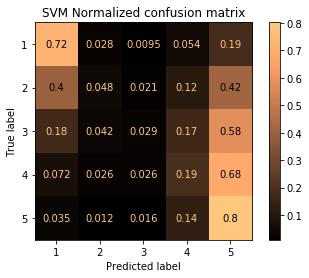

In [33]:
# Plot normalized confusion matrix
classes = ["1", "2", "3", "4", "5"]
title = "SVM Normalized confusion matrix"
disp = plot_confusion_matrix(grid, X_test, y_test, display_labels = classes, cmap = "copper", normalize = "true")
disp.ax_.set_title(title)

plt.show()

In [32]:
# See the result of the model with Test Set

test_transformed = svm_nystroem.transform(X_test)

test_pred = grid.predict(X_test)
micro_f1 = f1_score(y_true = y_test, y_pred = test_pred, average = 'micro')
print('Micro F1 Score of Test Data: {}'.format(micro_f1))

Micro F1 Score of Test Data: 0.4225654281946477
